In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

# reading train/test data

In [2]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns", 1000)

In [3]:
data_test = pd.read_csv("test_titanic.csv")
data_train = pd.read_csv("train_titanic.csv")

# shapes of train/test datasets

In [4]:
print("Test shape:", data_test.shape)
print("Train shape:", data_train.shape)

Test shape: (418, 11)
Train shape: (891, 12)


# sample of train dataset

In [5]:
data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S


In [6]:
# if "Cabin" column has some ordered sense
data_train.loc[~data_train["Cabin"].isnull()]["Cabin"]

1                  C85
3                 C123
6                  E46
10                  G6
11                C103
21                 D56
23                  A6
27         C23 C25 C27
31                 B78
52                 D33
54                 B30
55                 C52
61                 B28
62                 C83
66                 F33
75               F G73
88         C23 C25 C27
92                 E31
96                  A5
97             D10 D12
102                D26
110               C110
118            B58 B60
123               E101
124                D26
128              F E69
136                D47
137               C123
139                B86
148                 F2
151                 C2
166                E33
170                B19
174                 A7
177                C49
183                 F4
185                A32
193                 F2
194                 B4
195                B80
205                 G6
209                A31
215                D36
218        

# types of features

In [7]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
numeric_columns_index = data_train.select_dtypes([np.number]).columns

numerical_features_overview = [x for x in list(numeric_columns_index)]
numerical_features_overview

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [10]:
categorical_columns_index = data_train.select_dtypes([np.object]).columns

categorical_features_overview = [x for x in list(categorical_columns_index)]
categorical_features_overview

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# missing values percentage

In [11]:
def missing_values_percentage(data):
    nulled_values = data.isnull()
    total_missed = nulled_values.sum().sort_values(ascending=False)
    percent_missed = (nulled_values.sum()/nulled_values.count()*100).sort_values(ascending=False)

    total_percent_missed_train = pd.concat([total_missed, percent_missed], axis=1,
                                      keys=["Total amount", "Percent missed"])

    print(total_percent_missed_train)

In [12]:
missing_values_percentage(data_train)

             Total amount  Percent missed
Cabin                 687       77.104377
Age                   177       19.865320
Embarked                2        0.224467
Fare                    0        0.000000
Ticket                  0        0.000000
Parch                   0        0.000000
SibSp                   0        0.000000
Sex                     0        0.000000
Name                    0        0.000000
Pclass                  0        0.000000
Survived                0        0.000000
PassengerId             0        0.000000


In [13]:
missing_values_percentage(data_test)

             Total amount  Percent missed
Cabin                 327       78.229665
Age                    86       20.574163
Fare                    1        0.239234
Embarked                0        0.000000
Ticket                  0        0.000000
Parch                   0        0.000000
SibSp                   0        0.000000
Sex                     0        0.000000
Name                    0        0.000000
Pclass                  0        0.000000
PassengerId             0        0.000000


# checking for duplicates

In [14]:
data_train[data_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [15]:
data_test[data_test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# categorical variations

In [16]:
data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [17]:
data_test.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64

# distributions

In [18]:
data_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Saundercock, Mr. William Henry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


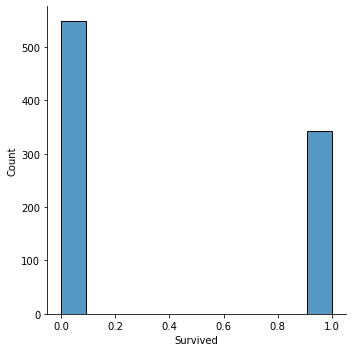

In [19]:
sns.displot(data_train["Survived"], kde=False)

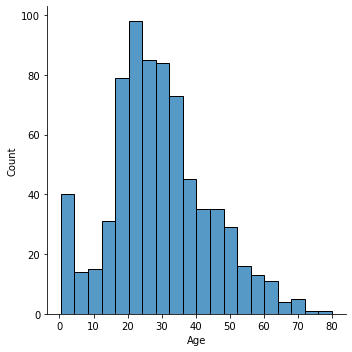

In [20]:
sns.displot(data_train["Age"], kde=False)

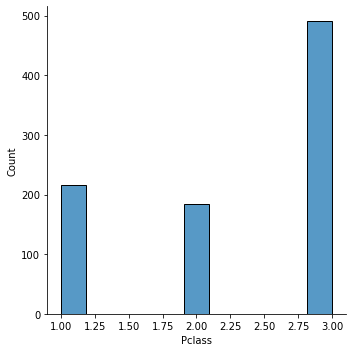

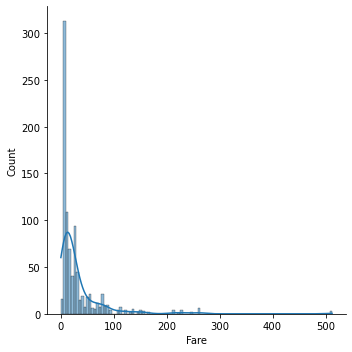

In [21]:
sns.displot(data_train["Pclass"], kde=False)
sns.displot(data_train["Fare"], kde=True)

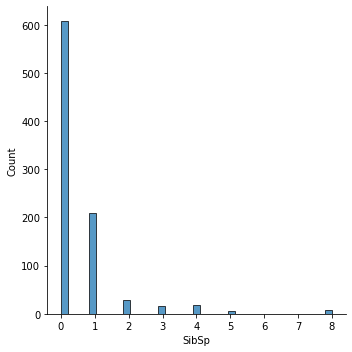

In [22]:
sns.displot(data_train["SibSp"], kde=False)

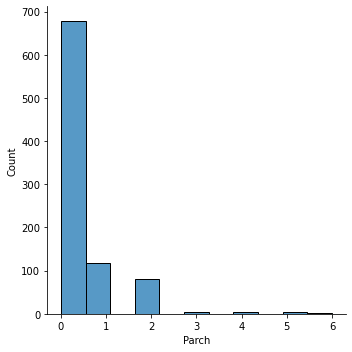

In [23]:
sns.displot(data_train["Parch"], kde=False)

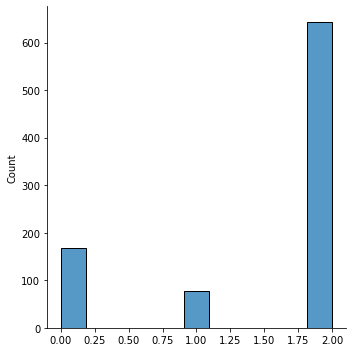

In [24]:
# 2 --> S
# 1 --> Q
# 0 --> C
embarked_temp = data_train["Embarked"].copy().astype("category").cat.codes
sns.displot(embarked_temp[embarked_temp >= 0], kde=False)

# numerical features overview outliers

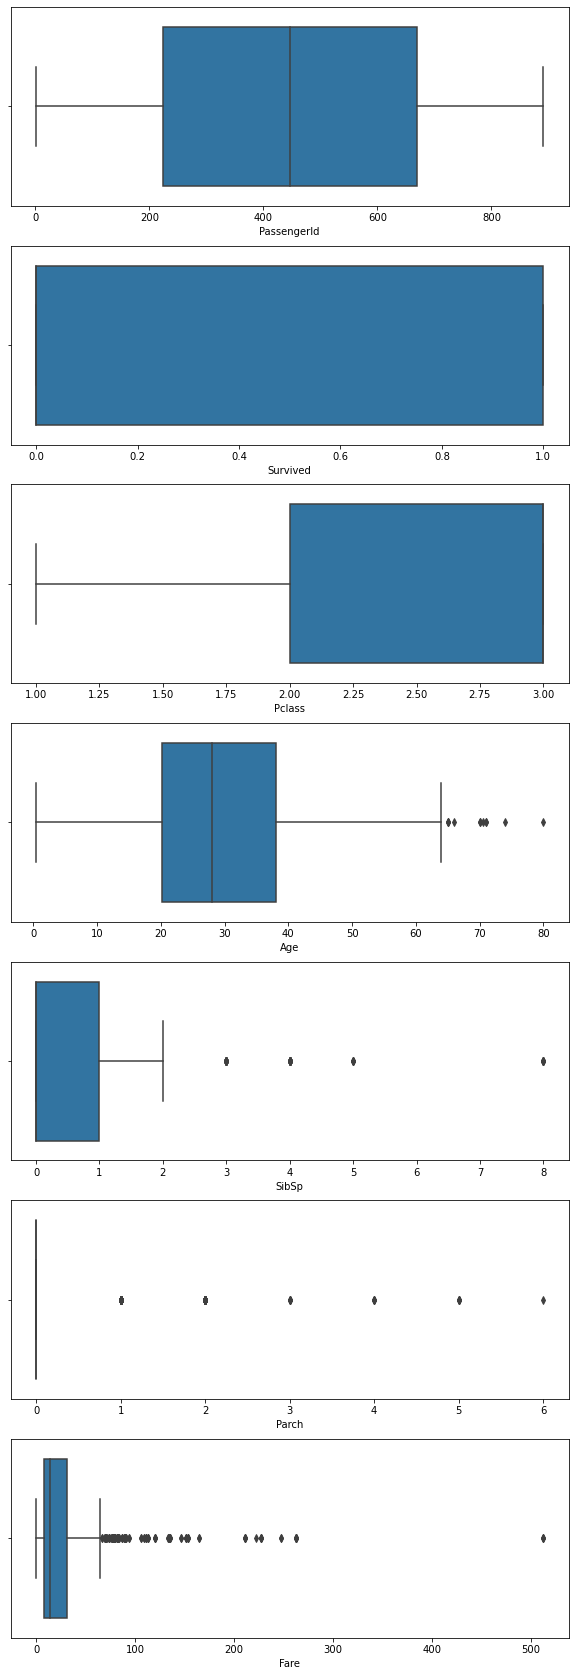

In [25]:
fig, axes = plt.subplots(nrows=len(numerical_features_overview), ncols=1)
fig.set_size_inches(10,30)
for i, col in enumerate(numerical_features_overview):
    sns.boxplot(x=data_train[col], ax=axes[i])
plt.show()

# Corellation Matrix

<AxesSubplot:>

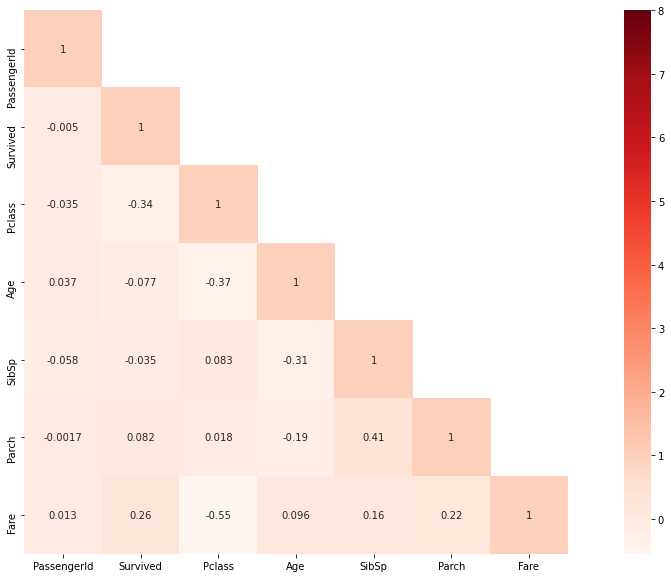

In [26]:
corrMatt = data_train[numerical_features_overview].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Reds", mask=mask, vmax=8, square=True, annot=True)

# drop Class due to high correlation with other features & Parch

# data preprocessing

## steps
1. extracting TARGET column (Survived)
2. feature extraction (categorical|numerical split)
3. handling missing values
    1. imputation (according to feature distribution)
4. feature transformation
    1. extracting prefixes from name
    3. one-hot encoding
    4. normalization

In [27]:
data_test = pd.read_csv("test_titanic.csv")
data_train = pd.read_csv("train_titanic.csv") 
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
prepared_data_test = data_test
prepared_data_train = data_train
# cabin removing due to emptiness
# and Ticket

ps_id_test = prepared_data_test["PassengerId"]
prepared_data_train.drop(columns={"Cabin","Ticket","PassengerId"},inplace=True)
prepared_data_test.drop(columns={"Cabin","Ticket","PassengerId"},inplace=True)

In [29]:
categorical_features = ["Name", "Embarked", "Sex", "SibSp", "Parch"]
numerical_features = ["Age", "Fare"]

In [30]:
selected_features =  numerical_features + categorical_features

In [31]:
def extract_prefixes(data):
    prefixes = {
    "Capt": "Сrew",
    "Col": "Сrew",
    "Major": "Сrew",
    "Jonkheer": "VIP",
    "Don": "VIP",
    "Sir" : "VIP",
    "Dr": "Сrew",
    "Rev": "Сrew",
    "the Countess":"VIP",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "VIP"
    }
    
    for i in range(len(data)):
        cur_name = data[i]
        
        for prefix in prefixes.keys():
            if prefix in cur_name:
                cur_name = prefixes[prefix]
                break
                
        data[i] = cur_name
        
    return data  

In [32]:
def uniques(column):
    uniques_set = set()
    for val in column:
        uniques_set.add(val)
            
    return uniques_set

In [33]:
# extract prefixes
prepared_data_train["Name"] = extract_prefixes(prepared_data_train["Name"])
prepared_data_test["Name"] = extract_prefixes(prepared_data_test["Name"])

print(prepared_data_test.shape)
print(prepared_data_train.shape)
print(prepared_data_test.select_dtypes("object").apply(pd.Series.nunique, axis=0))
print(prepared_data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0))

(418, 8)
(891, 9)
Name        5
Sex         2
Embarked    3
dtype: int64
Name        6
Sex         2
Embarked    3
dtype: int64


In [34]:
# make test and train name labels match
def clean_data(df, val_set):
    df = df.loc[~df.Name.isin(val_set)]
    return df
    
unique_name_train = uniques(prepared_data_train["Name"])
unique_name_test = uniques(prepared_data_test["Name"])

remove_in_train = unique_name_train.difference(unique_name_test)
remove_in_test = unique_name_test.difference(unique_name_train)

print(f"remove in train {remove_in_train}")
print(f"remove in test {remove_in_test}")

prepared_data_train = clean_data(prepared_data_train, remove_in_train)
prepared_data_test = clean_data(prepared_data_test, remove_in_test)

TARGET = prepared_data_train["Survived"]
prepared_data_train = prepared_data_train.drop("Survived",axis=1)

remove in train {'Mrs'}
remove in test set()


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', StandardScaler())
        ]
)

categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


prepr = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, numerical_features),
         ('categorical', categorical_transformer, categorical_features)
     ]
)

In [36]:
print(prepared_data_train.dtypes)
print(prepared_data_test.dtypes)

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [37]:
def transform(data):
    prepr.fit(data)
    return prepr.transform(data)

train_x = transform(prepared_data_train)
test_x = transform(prepared_data_test)

train_y = TARGET

print(f"trainX:",train_x.shape)
print(f"testX:",test_x.shape)

print(f"trainY:",train_y.shape)
print()

trainX: (889, 27)
testX: (418, 27)
trainY: (889,)



In [38]:
ALL_DATA = prepared_data_test.append(prepared_data_train)
ALL_DATA.shape

ALL_X = transform(ALL_DATA)

# modeling

## steps

1. building classifier (selected features)
4. selected features clustering 
    1. dimensionality reductiong w/ t-SNE
    2. K-means, DBSCAN clustering
    3. agglomerative approach

In [39]:
# for building classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [40]:
train_split_x, validate_x, train_split_y, validate_y =train_test_split(train_x, train_y, test_size=0.2)
print(f"Train: {train_split_x.shape}, {train_split_y.shape}")
print(f"Validation: {validate_x.shape}, {validate_y.shape}")

Train: (711, 27), (711,)
Validation: (178, 27), (178,)


## Logistic Regression & RandomForestClassifier

In [41]:
lr = LogisticRegression()
lr.fit(train_split_x, train_split_y)

train_preds = lr.predict(train_split_x)
print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
test_preds = lr.predict(validate_x)
print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

Train ROC_AUC: 0.805483854641158
Validation ROC_AUC: 0.8058708414872798


In [42]:
clf = RandomForestClassifier(max_depth=10)
clf.fit(train_split_x, train_split_y)

train_preds = clf.predict(train_split_x)
print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
test_preds = clf.predict(validate_x)
print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

Train ROC_AUC: 0.8988510982893005
Validation ROC_AUC: 0.7894977168949772


In [43]:
# kaggle score is 0.77511
model = clf
#get probs for test data
probs = model.predict(test_x)
#save to disk
pd.DataFrame({
    "PassengerId": ps_id_test,
    "Survived": [pr for pr in probs]
}).to_csv("./my_res_titanic.csv",index=False)

# dimension folding

In [44]:
def plot_cluster(data, labels):
    plt.scatter(data[:,0],data[:,1], c=labels, cmap='rainbow')

# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE
train_x_clust = train_x
test_x_clust = test_x

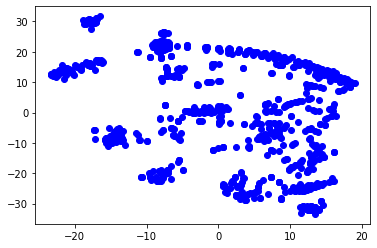

In [45]:
# The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
perplexity_tsne = 45

tsne = TSNE(perplexity=perplexity_tsne, n_iter=5000, random_state=30)

tsne_representation = tsne.fit_transform(train_x_clust)

plot_cluster(tsne_representation, "blue")

# Kmeans

In [46]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

def kmeans(folded_repr, clusters):
   # 'k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    kmeans = KMeans(algorithm='elkan', init='k-means++', max_iter=1000,
    n_clusters=clusters,
    random_state=None, verbose=0)
    labels = kmeans.fit(folded_repr).labels_
    plot_cluster(folded_repr, labels)

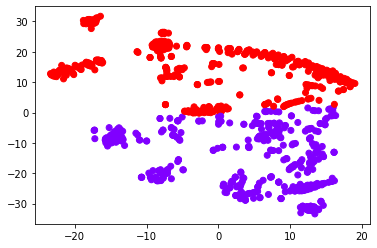

In [47]:
kmeans(tsne_representation,2)

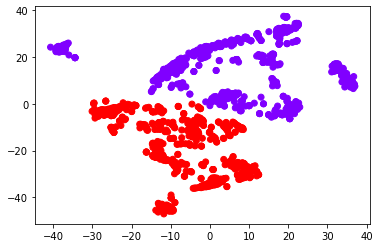

In [48]:
tnse_all_x_repr = tsne.fit_transform(ALL_X)
kmeans(tnse_all_x_repr,2)

# DBSCAN

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN

def dbscan(folded_repr, eps_):
    # eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    db = DBSCAN(eps=eps_, min_samples=2)
    db.fit(folded_repr)
    labels = db.labels_
    plot_cluster(folded_repr, labels)

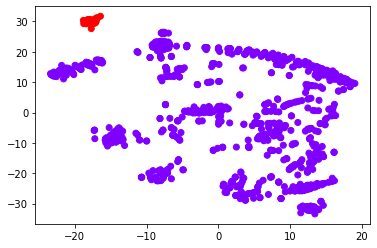

In [50]:
dbscan(tsne_representation,6)

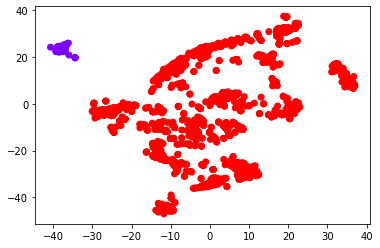

In [51]:
dbscan(tnse_all_x_repr,14)

# agglomerative clustering

In [52]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering

# Recursively merges the pair of clusters that minimally increases a given linkage distance.
def agglomerative(folded_repr, link, clusters):
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage=link)
    cluster.fit(folded_repr)
    labels = cluster.labels_
    plot_cluster(folded_repr, labels)

## single linkage
### uses the minimum of the distances between all observations of the two sets.


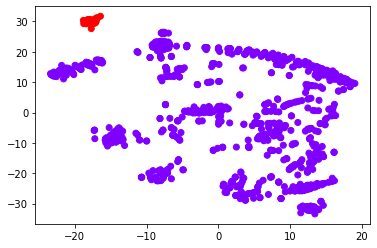

In [53]:
agglomerative(tsne_representation, "single", 2)

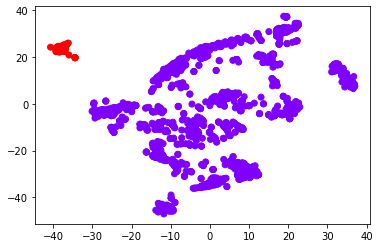

In [54]:
agglomerative(tnse_all_x_repr, "single",2)

## ward linkage
### minimizes the variance of the clusters being merged.


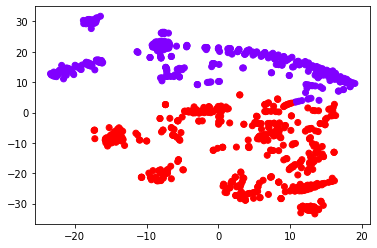

In [55]:
agglomerative(tsne_representation, "ward", 2)

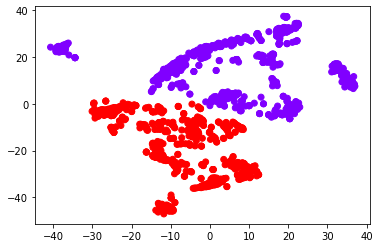

In [56]:
agglomerative(tnse_all_x_repr, "ward", 2)

## average linkage
### uses the average of the distances of each observation of the two sets.


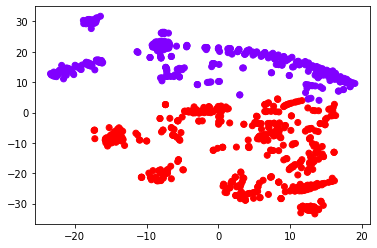

In [57]:
agglomerative(tsne_representation, "average", 2)

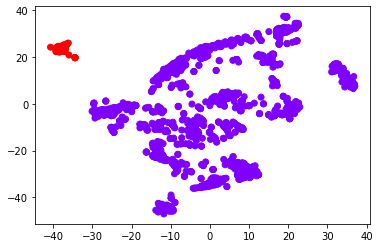

In [58]:
agglomerative(tnse_all_x_repr, "average",2)

## complete linkage
### uses the maximum distances between all observations of the two sets.


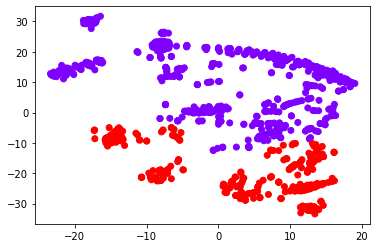

In [59]:
agglomerative(tsne_representation, "complete",2)

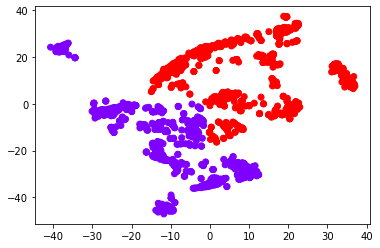

In [60]:
agglomerative(tnse_all_x_repr, "complete",2)